# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [7]:
print(app_train.head())
print(app_train.shape[0])
print(app_train.shape[1])
print(app_train.columns)

   SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0           M             0   
1      100003       0                   0           F             0   
2      100004       0                   1           M             1   
3      100006       0                   0           F             0   
4      100007       0                   0           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0            

(array([13679., 33111., 38424., 41746., 40356., 34339., 33544., 32650.,
        27685., 11977.]),
 array([20.51780822, 25.37808219, 30.23835616, 35.09863014, 39.95890411,
        44.81917808, 49.67945205, 54.53972603, 59.4       , 64.26027397,
        69.12054795]),
 <a list of 10 Patch objects>)

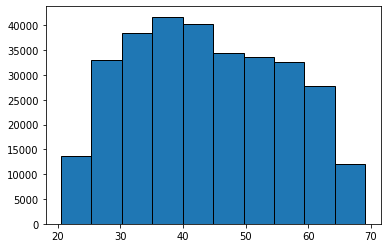

In [24]:
app_train['DAYS_BIRTH_BIN'] = pd.cut(app_train['DAYS_BIRTH']/365,10)
app_train['DAYS_BIRTH_BIN'].value_counts() 
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor = 'k', bins = 10)

In [34]:
app_train_bodbin=app_train[['TARGET','DAYS_BIRTH_BIN']]
age_groups= app_train_bodbin.groupby('DAYS_BIRTH_BIN').mean()
age_groups

,TARGET
DAYS_BIRTH_BIN,
"(20.469, 25.378]",0.122012
"(25.378, 30.238]",0.111390
"(30.238, 35.099]",0.101900
"(35.099, 39.959]",0.089468
"(39.959, 44.819]",0.078984
"(44.819, 49.679]",0.074437
"(49.679, 54.54]",0.067911
"(54.54, 59.4]",0.055926
"(59.4, 64.26]",0.052953


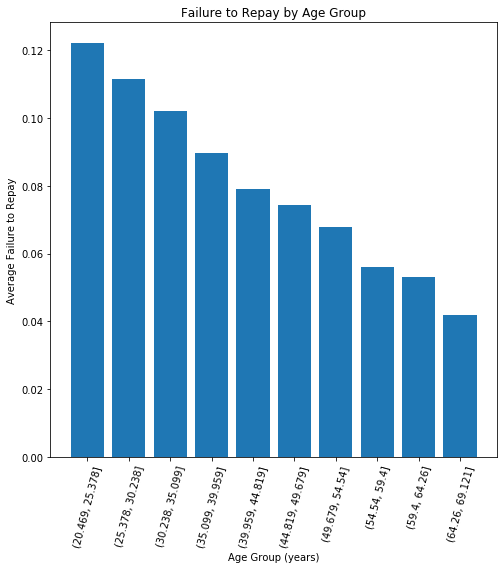

In [37]:

plt.figure(figsize = (8, 8))

# 繪製目標值平均與分組組別的長條圖
plt.bar(range(len(age_groups.index)), age_groups['TARGET'])
# 加上 X, y 座標說明, 以及圖表的標題
plt.xticks(range(len(age_groups.index)), age_groups.index, rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by Age Group');

In [12]:
app_train['DAYS_BIRTH_QBIN'] = pd.qcut(app_train['DAYS_BIRTH']/365,10)
app_train['DAYS_BIRTH_QBIN'].value_counts() 

(43.151, 47.178]    30764
(28.175, 32.038]    30760
(36.0, 39.496]      30759
(51.74, 56.093]     30758
(56.093, 60.77]     30757
(20.517, 28.175]    30752
(39.496, 43.151]    30745
(32.038, 36.0]      30745
(60.77, 69.121]     30738
(47.178, 51.74]     30733
Name: DAYS_BIRTH_QBIN, dtype: int64

In [13]:
app_train['DAYS_EMPLOYED'].head()

0    -637.0
1   -1188.0
2    -225.0
3   -3039.0
4   -3038.0
Name: DAYS_EMPLOYED, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([5.00000e+01, 2.61000e+02, 9.55000e+02, 2.02700e+03, 3.39100e+03,
        6.55900e+03, 1.13820e+04, 2.79320e+04, 6.51880e+04, 1.34392e+05]),
 array([-49.0739726 , -44.16657534, -39.25917808, -34.35178082,
        -29.44438356, -24.5369863 , -19.62958904, -14.72219178,
         -9.81479452,  -4.90739726,   0.        ]),
 <a list of 10 Patch objects>)

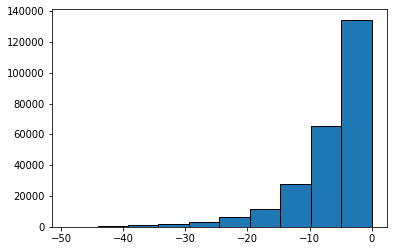

In [23]:
app_train['DAYS_EMPLOYED_BIN'] = pd.cut(app_train['DAYS_EMPLOYED']/365,10)
app_train['DAYS_EMPLOYED_BIN'].value_counts() 
#plt.hist(app_train['DAYS_EMPLOYED_BIN'], edgecolor = 'k', bins = 25)
plt.hist(app_train['DAYS_EMPLOYED']/365, edgecolor = 'k', bins = 10)

In [15]:
app_train['DAYS_EMPLOYED_QBIN'] = pd.qcut(app_train['DAYS_EMPLOYED']/365,10)
app_train['DAYS_EMPLOYED_QBIN'].value_counts() 

(-3.425, -2.518]                  25261
(-1.69, -0.912]                   25247
(-49.074999999999996, -14.611]    25225
(-7.649, -5.918]                  25224
(-10.071, -7.649]                 25222
(-4.515, -3.425]                  25214
(-14.611, -10.071]                25203
(-5.918, -4.515]                  25197
(-0.912, 0.0]                     25178
(-2.518, -1.69]                   25166
Name: DAYS_EMPLOYED_QBIN, dtype: int64